In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [116]:
import matplotlib
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [117]:
data = pd.read_csv("/home/piai/테스트/Car.csv")
data.head()
# 1 Price = ₩ 1,000
# 1 Lak = ₩ 1,700,000

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [119]:
print(data.shape)

(7253, 13)


In [120]:
# 총 데이터의 개수: 7253, 목표변수 Price와 12개의 Features가 존재한다.
# 변수들이 object형과 int,float형으로 나뉘어 있으므로, 범주형 변수들의 전처리가 필요할 것이다.

In [121]:
print(data.isnull().sum())
print(data.shape)

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64
(7253, 13)


In [122]:
# 목표변수 Price에 NULL값이 존재하며 Mileage나 Engine과 같은 일부 Features에도 결측값이 존재하는 것을 확인할 수 있다.
# 변수들의 Null값에 대한 처리 필요.

In [123]:
dt_missing = data.isnull().sum().reset_index()
dt_missing.columns = ['column', 'count']
dt_missing['ratio'] = dt_missing['count'] / data.shape[0]
dt_missing.loc[dt_missing['ratio'] != 0]

,column,count,ratio
2,Price,1053,0.145181
8,Mileage,2,0.000276
9,Engine,46,0.006342
10,Power,46,0.006342
11,Seats,53,0.007307
12,New_Price,6247,0.861299


In [124]:
# Mileage, Engine, Power, Seats

In [125]:
data['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [126]:
# Electric인 차량은 2대로 전체 데이터중 비율상으로 극 소수이며, CNG와 LPG도 낮은 점유율을 보인다.

In [127]:
print(data.isnull().sum())
print(data.shape)

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64
(7253, 13)


# 종속변수 분포 체크

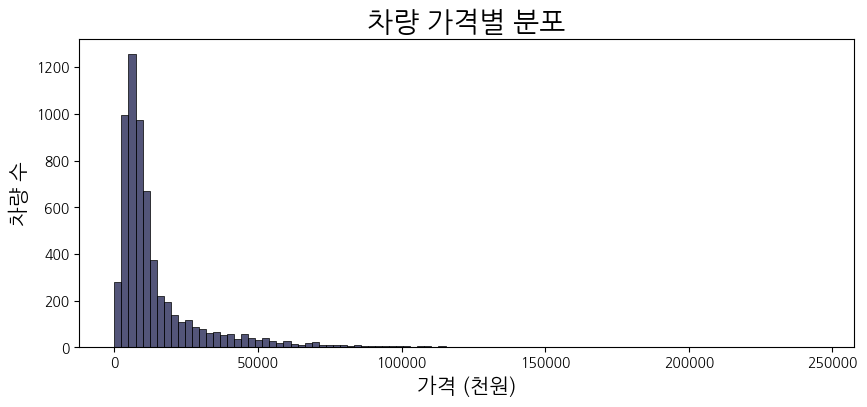

In [128]:
plt.figure(figsize=(10, 4))

sns.histplot(data['Price'], bins=100, kde=False, color='#191c4cff')  # Adjust the number of bins as needed

plt.title('차량 가격별 분포', fontsize=20)
plt.xlabel('가격 (천원)', fontsize=15)
plt.ylabel('차량 수', fontsize=15)


plt.show()

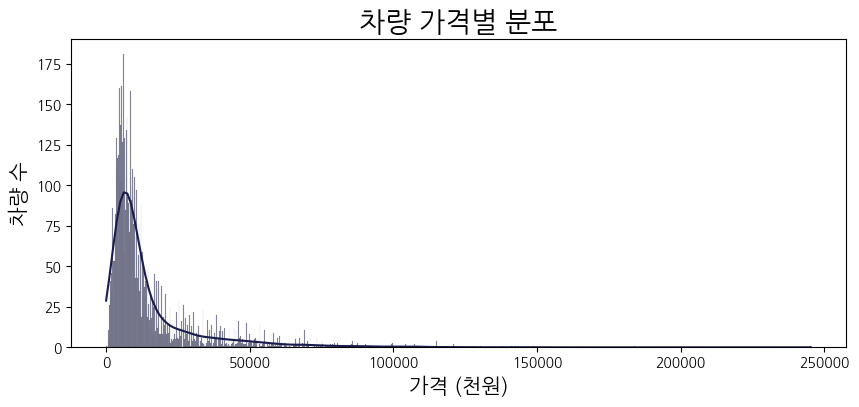

In [129]:
plt.figure(figsize=(10, 4))

sns.histplot(data['Price'], bins=1000, kde=True, color='#191c4cff')  # Adjust the number of bins as needed

plt.title('차량 가격별 분포', fontsize=20)
plt.xlabel('가격 (천원)', fontsize=15)
plt.ylabel('차량 수', fontsize=15)


plt.show()

In [130]:
# plt.figure(figsize=(10, 4))

# sns.kdeplot(data['Price'], color='#191c4cff')


# plt.title('차량 가격별 분포', fontsize=20)
# plt.xlabel('가격 (천원)', fontsize=15)
# plt.ylabel('차량 수', fontsize=15)

# plt.show()

In [131]:
data['Kilometers_Driven']

0       72000
1       41000
2       46000
3       87000
4       40670
        ...  
7248    89411
7249    59000
7250    28000
7251    52262
7252    72443
Name: Kilometers_Driven, Length: 7253, dtype: int64

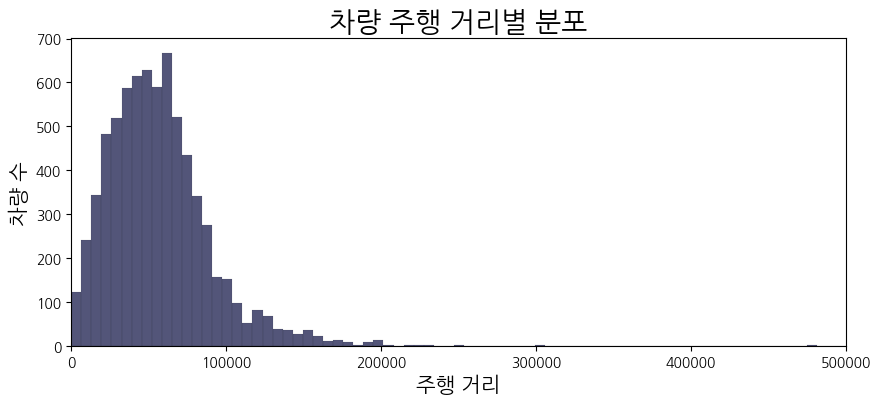

In [132]:
plt.figure(figsize=(10, 4))

sns.histplot(x = data['Kilometers_Driven'], bins=1000, kde=False, color='#191c4cff')  # Adjust the number of bins as needed

plt.title('차량 주행 거리별 분포', fontsize=20)
plt.xlabel('주행 거리', fontsize=15)
plt.ylabel('차량 수', fontsize=15)
plt.xlim(0,500000)

plt.show()

In [133]:
# 주행거리 별 차량수 분포 // 주행거리 30만과 50만 부근에 이상치가 존재.

<Axes: title={'center': '차량 주행 거리별 분포'}, xlabel='주행 거리', ylabel='차량 가격'>

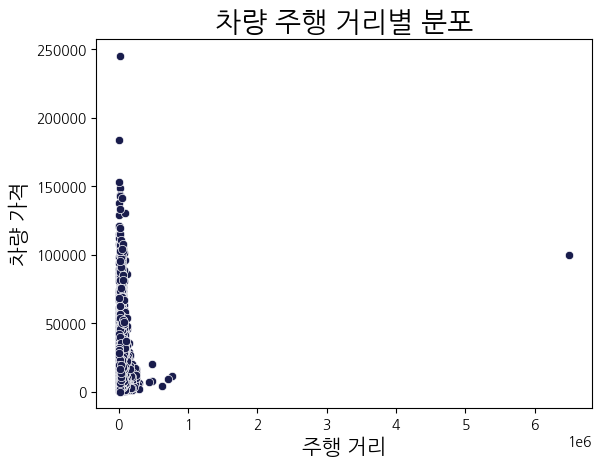

In [319]:
x = data['Kilometers_Driven']
y = data['Price']

sns.set_style()
plt.title('차량 주행 거리별 분포', fontsize=20)
plt.xlabel('주행 거리', fontsize=15)
plt.ylabel('차량 가격', fontsize=15)
sns.scatterplot(x=x, y=y, color='#191c4cff')
#plt.xlim(0,500000)

In [135]:
# 주행거리 60만이 넘는 지점에 이상치가 존재하는 것을 확인할 수 있다.

(0.0, 500000.0)

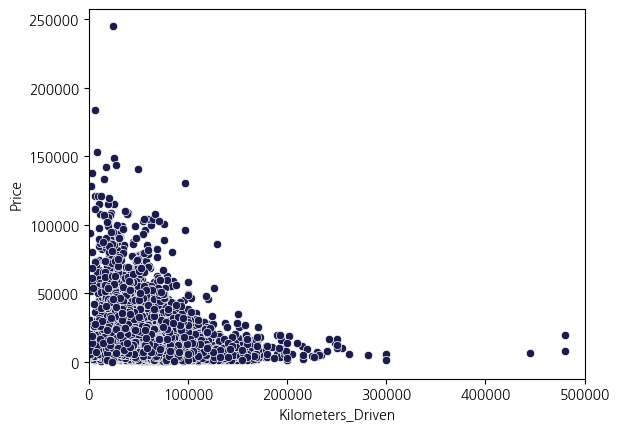

In [136]:
x = data['Kilometers_Driven']
y = data['Price']

sns.set_style()
sns.scatterplot(x=x, y=y, color='#191c4cff')
plt.xlim(0,500000)

In [137]:
# 주행거리 별 Price의 대략적인 분포 확인.  
# 주행거리가 늘어나면, 대체로 Price가 줄어드는 경향성을 보일 수 있다.

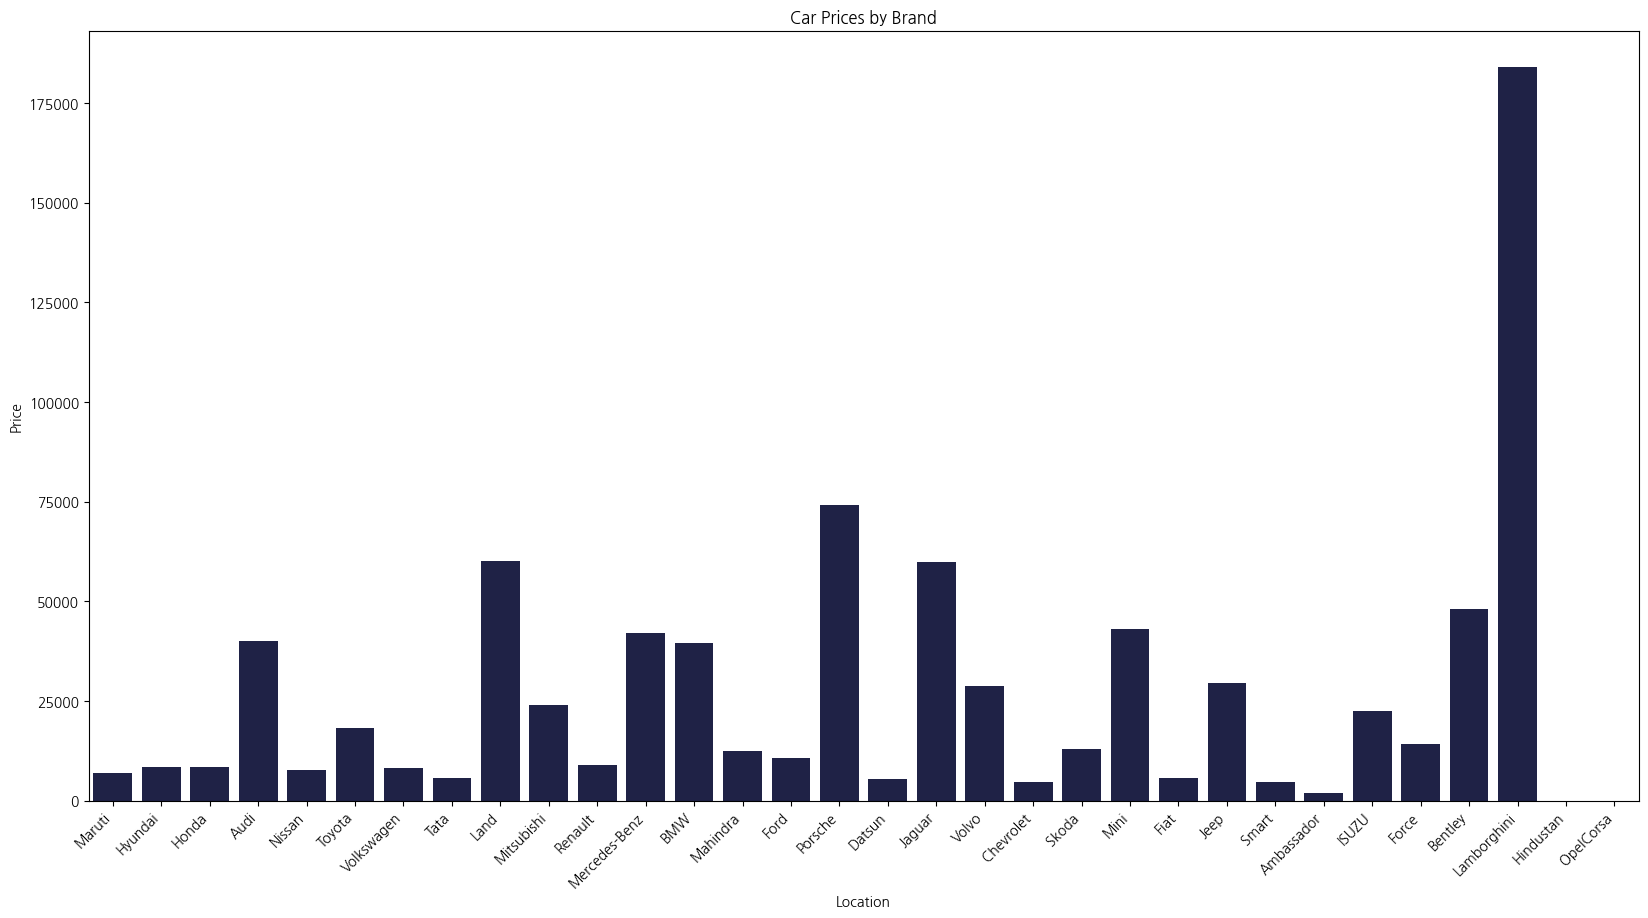

In [138]:
# Set the figure size
Brand = pd.DataFrame()

plt.figure(figsize=(20, 10))
Brand['Name'] = data['Name'].str.split().str[0]

sns.barplot(
    x=Brand['Name'],
    y=data['Price'],
    color="#191c4cff",  
    ci=False
)

# Customize the plot
plt.title('Car Prices by Brand')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [139]:
# 브랜드 별로 가격이 다를 것이다. // Price가 존재하지 않는 Brand의 차량이 데이터 상에 존재한다.

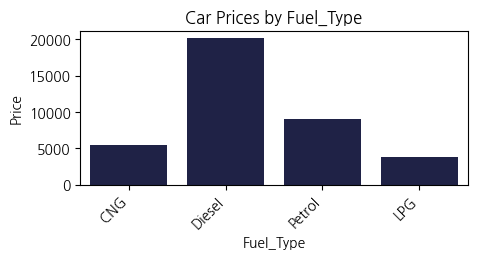

In [323]:
# Set the figure size
plt.figure(figsize=(5, 2))

df = data[data['Fuel_Type'] != 'Electric']

sns.barplot(
    x=df['Fuel_Type'],
    y=df['Price'],
    color="#191c4cff",  
    ci=False
)

# Customize the plot
plt.title('Car Prices by Fuel_Type')
plt.xlabel('Fuel_Type')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [141]:
# Fuel_type이 Diesel, Electric일 때 가격이 높은 경향성을 보일 수도 있다.
# Electric은 데이터 수가 2개이기 때문에,이상치로 판단하여 전처리 과정에서 제외.

In [142]:
data['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [143]:
# Fuel_Type 중 Electric의 비율은 상당히 낮고, CNG, LPG도 전체 중 낮은 비율만을 차지한다.

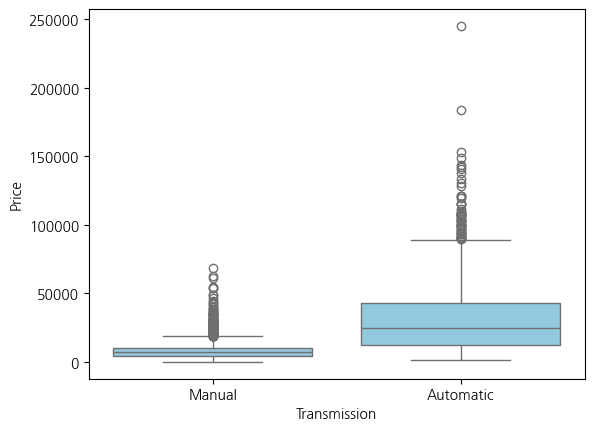

In [144]:
sns.boxplot(x = data['Transmission'],  y = data['Price'], color="#87CEEB")
plt.show()

In [145]:
# Transmission - Manual과 Automatic에 대한 이상치가 다수 존재.
# Manual은 가격이 Automatic보다 경향이 있을 것이다.
# Automatic에는 Price에 대한 지나치게 높은 이상치가 존재.

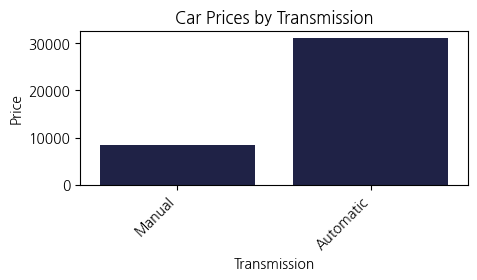

In [146]:
# Set the figure size
plt.figure(figsize=(5, 2))

sns.barplot(
    x=data['Transmission'],
    y=data['Price'],
    color="#191c4cff",  
    ci=False
)

# Customize the plot
plt.title('Car Prices by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [147]:
# Manual은 가격이 Automatic보다 경향이 있을 것이다.

In [148]:
plt.figure(figsize=(10, 4))


data_sorted = data.sort_values(by='Mileage')
data_sorted['Mileage_numeric'] = data_sorted['Mileage'].str.extract('(\d+)').astype(float)
data_sorted['Mileage_numeric']

6957    0.0
2267    0.0
2343    0.0
2542    0.0
2597    0.0
       ... 
557     9.0
3580    9.0
1288    9.0
4446    NaN
4904    NaN
Name: Mileage_numeric, Length: 7253, dtype: float64

<Figure size 1000x400 with 0 Axes>

In [149]:
# Mileage별 분포를 확인하기 위해 numeric으로 변경.

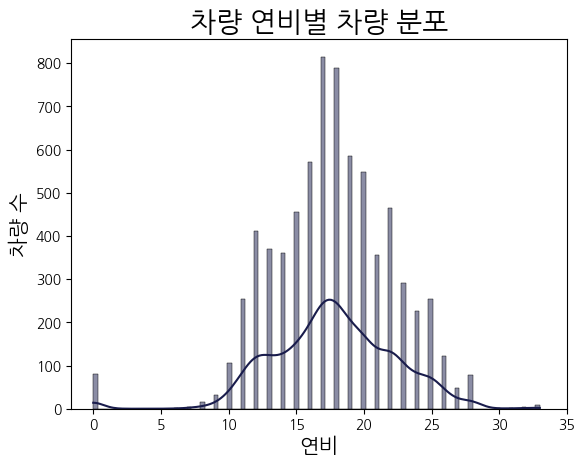

In [150]:
sns.histplot(x = data_sorted['Mileage_numeric'], bins=100, kde=True, color='#191c4cff')  # Adjust the number of bins as needed



plt.title('차량 연비별 차량 분포', fontsize=20)
plt.xlabel('연비', fontsize=15)
plt.ylabel('차량 수', fontsize=15)
plt.xticks(range(0, 40, 5))
plt.show()

In [151]:
# 연비 별 차량수에서, 연비가 0인 이상치가 존재한다. 연비 30이상인 차량도 소수 존재.

In [152]:
# 연비와 차량수가 종모양과 같은 형태를 보임. 

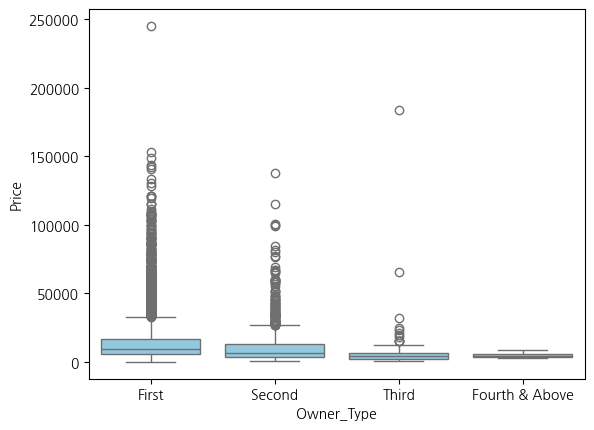

In [153]:
desired_order = ['First', 'Second', 'Third', 'Fourth & Above']

data['Owner_Type'] = data['Owner_Type'].astype(pd.CategoricalDtype(categories=desired_order, ordered=True))

sns.boxplot(x = data['Owner_Type'],  y = data['Price'], color="#87CEEB")
plt.show()

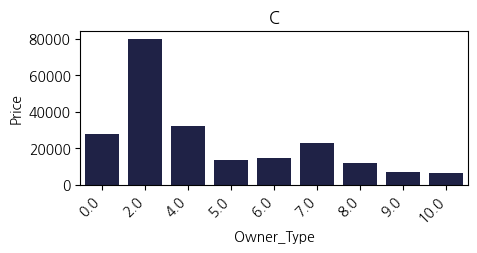

In [154]:
# Set the figure size
plt.figure(figsize=(5, 2))

sns.barplot(
    x=data['Seats'],
    y=data['Price'],
    color="#191c4cff",  
    ci=False
)

# Customize the plot
plt.title('C')
plt.xlabel('Owner_Type')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [155]:
# Owner_Type - First, Second, Third 대한 이상치가 다수 존재.
# 소유주 변경이 많을수록 가격이 낮아질 수 있다.
# First와 Third에서는 높은 이상치가 존재.

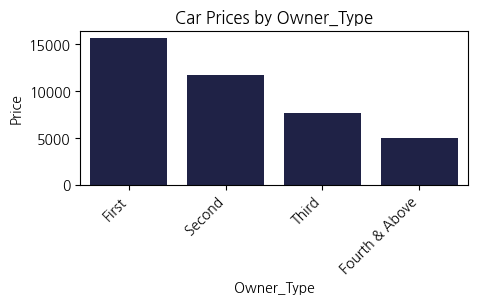

In [156]:
# Set the figure size
plt.figure(figsize=(5, 2))

sns.barplot(
    x=data['Owner_Type'],
    y=data['Price'],
    color="#191c4cff",  
    ci=False
)

# Customize the plot
plt.title('Car Prices by Owner_Type')
plt.xlabel('Owner_Type')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [157]:
# 소유주 변경이 많을수록 가격이 낮아질 수 있다.

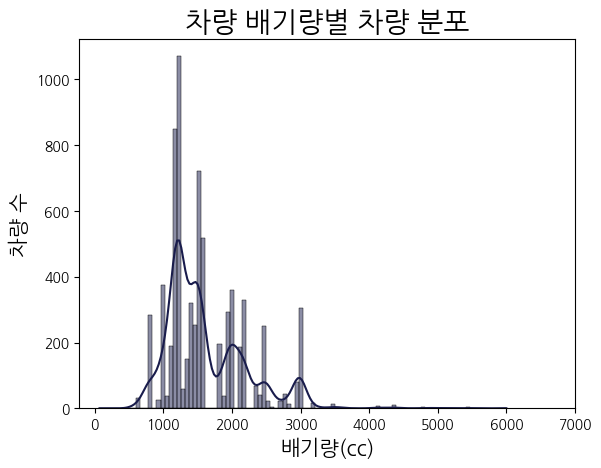

In [158]:
Engine_numeric = pd.DataFrame()

Engine_numeric['Engine_numeric'] = data['Engine'].str.extract('(\d+)').astype(float)
sns.histplot(x = Engine_numeric['Engine_numeric'], bins=100, kde=True, color='#191c4cff')  # Adjust the number of bins as needed



plt.title('차량 배기량별 차량 분포', fontsize=20)
plt.xlabel('배기량(cc)', fontsize=15)
plt.ylabel('차량 수', fontsize=15)
plt.xticks(range(0, 8000, 1000))
plt.show()

(0.0, 10000.0)

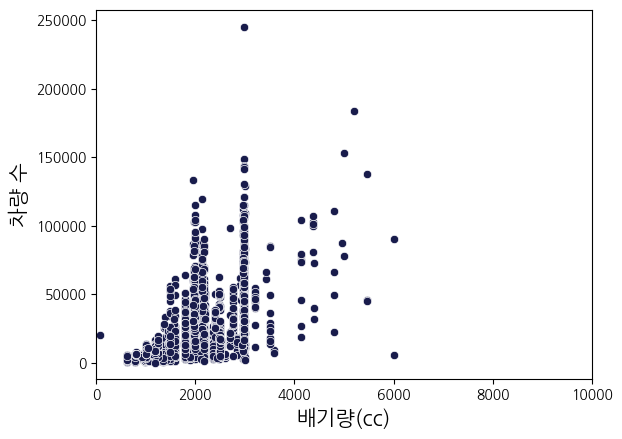

In [159]:
x = Engine_numeric['Engine_numeric']
y = data['Price']

sns.set_style()
sns.scatterplot(x=x, y=y, color='#191c4cff')
plt.xlabel('배기량(cc)', fontsize=15)
plt.ylabel('차량 수', fontsize=15)
plt.xlim(0,10000)

In [160]:
# 배기량은 대체로 5000cc 이하에 분포하지만, 6000cc 이상에도 소수의 차량이 존재.

In [161]:
data.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [162]:
Power_numeric = pd.DataFrame()
Power_numeric['Power_numeric'] = data['Power'].str.extract('(\d+)').astype(float)

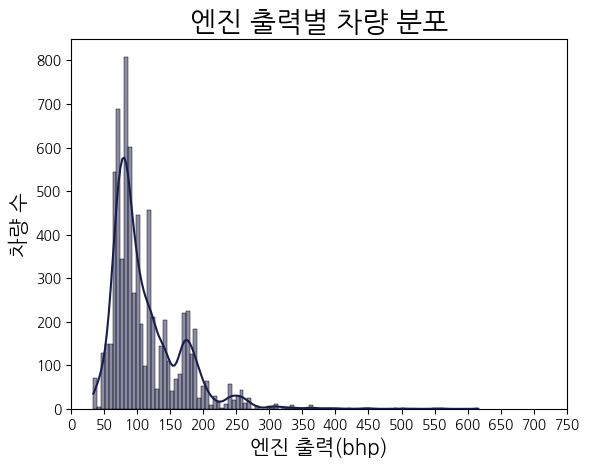

In [163]:
sns.histplot(x = Power_numeric['Power_numeric'], bins=100, kde=True, color='#191c4cff')  # Adjust the number of bins as needed



plt.title('엔진 출력별 차량 분포', fontsize=20)
plt.xlabel('엔진 출력(bhp)', fontsize=15)
plt.ylabel('차량 수', fontsize=15)
plt.xticks(range(0, 800, 50))
plt.show()

(0.0, 800.0)

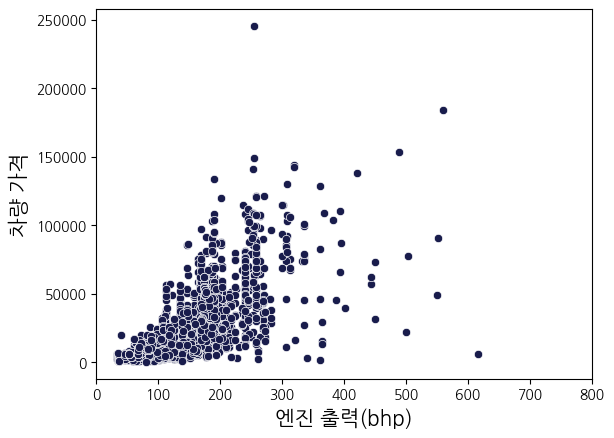

In [164]:
x = Power_numeric['Power_numeric']
y = data['Price']

sns.set_style()
sns.scatterplot(x=x, y=y, color='#191c4cff')
plt.xlabel('엔진 출력(bhp)', fontsize=15)
plt.ylabel('차량 가격', fontsize=15)
plt.xlim(0,800)

In [165]:
# 엔진 출력은 대부분이 300bhp 이하에 분포하지만, 500을 초과하는 차량들도 존재.

In [166]:
data['Seats'].value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

<Figure size 1200x500 with 0 Axes>

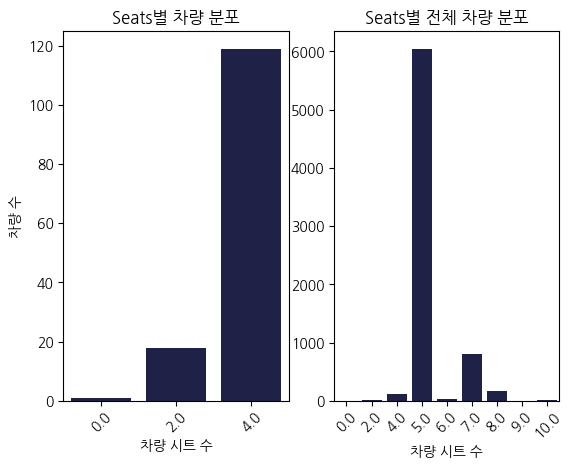

In [322]:
# Set the figure size
plt.figure(figsize=(12, 5))

filtered_df = data[data['Seats'].isin([0, 1, 2, 3, 4])]
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.countplot(x=filtered_df['Seats'], color="#191c4cff", ax=axes[0])
axes[0].set_title('Seats별 차량 분포')
axes[0].set_xlabel('차량 시트 수')
axes[0].set_ylabel('차량 수')
# Removed 'ha' parameter from the following line
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x=data['Seats'], color="#191c4cff", ax=axes[1])
axes[1].set_title('Seats별 전체 차량 분포')
axes[1].set_xlabel('차량 시트 수')
axes[1].set_ylabel('')
# Removed 'ha' parameter from the following line
axes[1].tick_params(axis='x', rotation=45)

# Show the plot
plt.show()

In [168]:
# 차량 시트 수 별 차량 분포를 확인. 시트 수가 0.0인 이상치 확인 가능.

In [169]:
# 시트 수가 5.0인 차량이 대부분의 비율을 차지하며, 7.0과 8.0이 뒤를 따름.

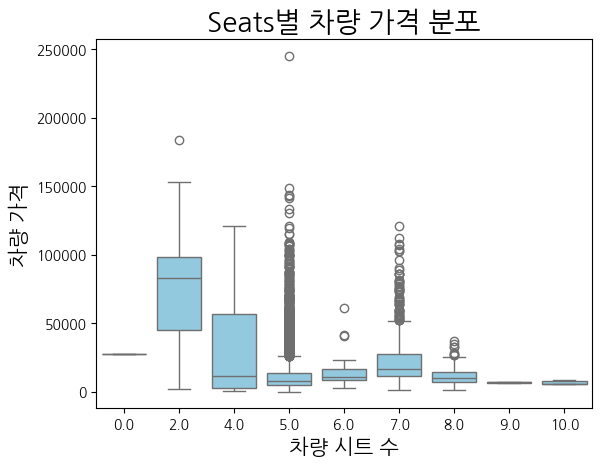

In [170]:
sns.boxplot(x = data['Seats'],  y = data['Price'], color="#87CEEB")
plt.title('Seats별 차량 가격 분포', fontsize=20)
plt.xlabel('차량 시트 수', fontsize=15)
plt.ylabel('차량 가격', fontsize=15)
plt.show()

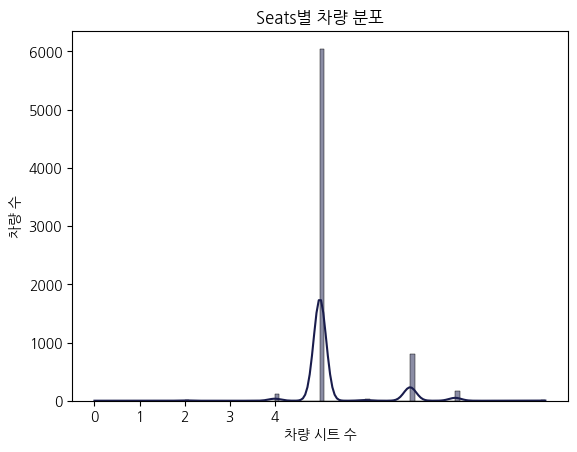

In [171]:
sns.histplot(x = data['Seats'],  bins=100, kde=True, color='#191c4cff')  # Adjust the number of bins as needed


plt.title('Seats별 차량 분포')
plt.xlabel('차량 시트 수')
plt.ylabel('차량 수')

plt.xticks(range(0, 5, 1))
plt.show()

In [172]:
# 차량 시트 수가 0.0인 이상치가 존재, 2.0과 5.0에도 범위를 크게 벗어나는 이상치 존재.

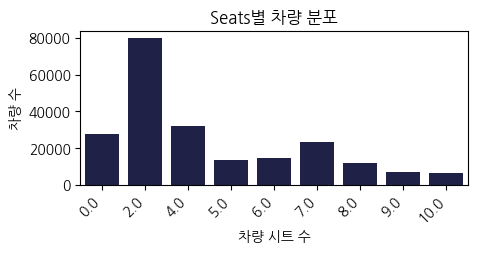

In [173]:
# Set the figure size
plt.figure(figsize=(5, 2))

sns.barplot(
    x=data['Seats'],
    y=data['Price'],
    color="#191c4cff",  
    ci=False
)

# Customize the plot
plt.title('Seats별 차량 분포')
plt.xlabel('차량 시트 수')
plt.ylabel('차량 수')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [174]:
# 차량 시트 수가 2.0일 때 가격 평균이 가장 높다. ///

In [175]:
data['New_Price'].value_counts()

95.13 Lakh    6
33.36 Lakh    6
63.71 Lakh    6
4.78 Lakh     6
11.75 Lakh    5
             ..
19.72 Lakh    1
12.46 Lakh    1
9.11 Lakh     1
5.53 Lakh     1
7.06 Lakh     1
Name: New_Price, Length: 625, dtype: int64

In [ ]:
#NewPrice는 결측치가 80%이므로 제외하고 모델을 생성하기로 한다.

In [ ]:
# data['Price_lakh'] = data['Price'].str.contains('lakh')
# data['Price_Cr'] = data['Price'].str.contains('Cr')

# data['Price_Cr']
# # data[['Price_Num_lakh', 'Price_Num_Cr']] = data['New_Price'].str.extract('([\d.]')

# # Convert 'Price_Num' to numeric (float) type
# data['Price_Num'] = pd.to_numeric(data['New_Price'], errors='coerce')

# # Display the resulting DataFrame
# print(data[['New_Price', 'Price_Num', 'Price_Unit']])

In [ ]:
# x = data['New_Price']
# y = data['Price']

# sns.set_style()
# sns.scatterplot(x=x, y=y, color='#191c4cff')
# plt.xlabel('신차 가격', fontsize=15)
# plt.ylabel('차량 가격(중고판매, 1000원)', fontsize=15)
# plt.xticks(range(0, 10, 1))

In [ ]:
# columns_to_plot = ['Fuel_Type', 'Transmission', 'Owner_Type','Seats' ]

# # Set up subplots
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# axes = axes.flatten()

# # Create boxplots for each column against 'Price'
# for i, col in enumerate(columns_to_plot):
#     sns.boxplot(x=data[col], y=data['Price'], ax=axes[i], color='#87CEEB')
#     axes[i].set_title(f'{col} vs. Price', fontsize=15)
#     axes[i].set_xlabel(col, fontsize=12)
#     axes[i].set_ylabel('Price', fontsize=12)

# plt.tight_layout()
# plt.show()

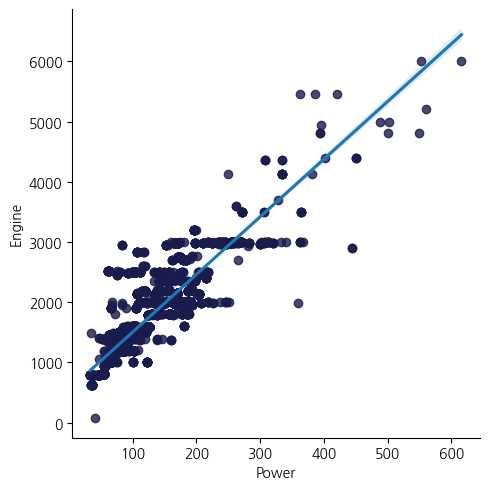

In [179]:
data['Power'] = data['Power'].str.extract('(\d+)').astype(float)
data['Engine'] = data['Engine'].str.extract('(\d+)').astype(float)
sns.lmplot(data=data, x='Power', y='Engine', scatter_kws={'color': '#191c4cff'})
plt.show()

In [ ]:
# Power와 Engine에 연관성이 클 것으로 예상된다.